# import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions

In [7]:
def predict(X, parametres = None, file = None):
     if (file != None):
          with open(file, 'r') as f:
               parametres = eval(f.read().replace("array", "np.array"))
     C = len(parametres) // 2
     activations = {'A0': X}
     for c in range(1, C + 1):
          Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
          activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
     
     return activations['A' + str(C)]

In [6]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000, file = "params.txt"):

    # récupération des parametres
    # si le fichier n'existe pas, il sera créé
    try: 
        with open(file, 'r') as f:
            parametres = eval(f.read().replace("array", "np.array"))
    except:
        # initialisation parametres
        dimensions = list(hidden_layers)
        dimensions.insert(0, X.shape[0])
        dimensions.append(y.shape[0])
        np.random.seed(1)
        parametres = {}
        C = len(dimensions)
        np.random.seed(1)
        for c in range(1, C):
            parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
            parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):
        # forward propagation
        activations = {'A0': X}
        for c in range(1, C + 1):
            Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
            activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

        # back propagation
        m = y.shape[1]
        dZ = activations['A' + str(C)] - y
        gradients = {}

        for c in reversed(range(1, C + 1)):
            gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
            gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
            if c > 1:
                dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

        # update
        for c in range(1, C + 1):
            parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
            parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]
            
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres) >= 0.5
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))
    
    # sauvegarde des parametres dans un fichier
    with open(file, 'w') as f:
        f.write(str(parametres))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label = 'train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label = 'train accuracy')
    plt.legend()
    plt.show()

    return training_history

# Dataset

In [5]:
# example of a dataset
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
X = np.array(X).T
y = np.array([[0, 0, 0, 1]])

# Training

100%|██████████| 1000/1000 [00:03<00:00, 257.06it/s]


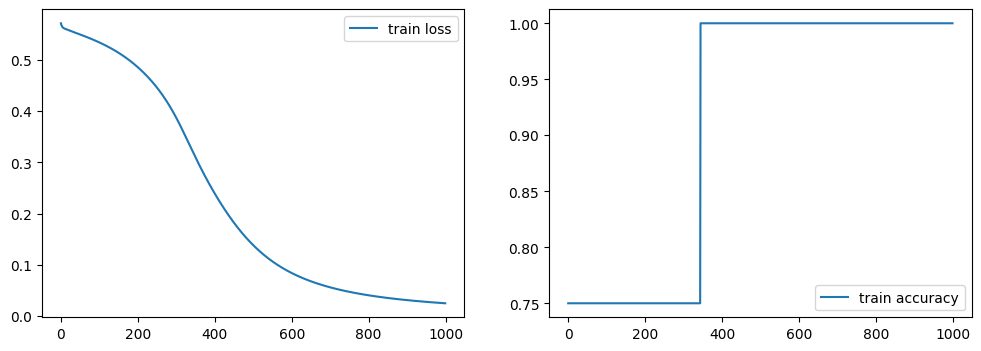

train loss: 0.024725251318516796 & train accuracy: 1.0


In [8]:
result = deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 1000, file = "params.txt");
print(f"train loss: { result[result.shape[0] - 1, 0] } & train accuracy: { result[result.shape[0] - 1, 1] }")

# Testing

In [22]:
test = [0, 0]; # inssert your test data here
test = np.array(test).T

print(predict(test, file = "params.txt")[0][0])

0.0044545141205753055
